In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def f(x):
    return x**4 - 3*x**3 + 2

In [22]:
f(2.0)

-6.0

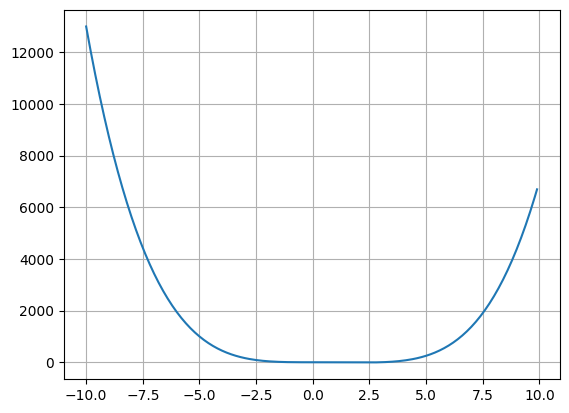

In [23]:
xs = np.arange(-10.0, 10.0, 0.1)
ys = f(xs)
plt.plot(xs, ys)
plt.grid()
plt.show()

In [24]:
h = 0.001
x = 7.5
dirv_x =(f(x + h) - f(x))/h
dirv_x

1181.5200270016248

In [ ]:
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

f = a * b + c
print(f)

a += h
d1f_da = ((a * b + c) - f) / h
print("f :", f)
print("slope at a=2.0:", d1f_da)


4.0
f : 4.0
slope at a=2.0 : -3.000000000010772


In [56]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __div__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'Loss'

In [57]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data: %.3f | grad: %.3f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

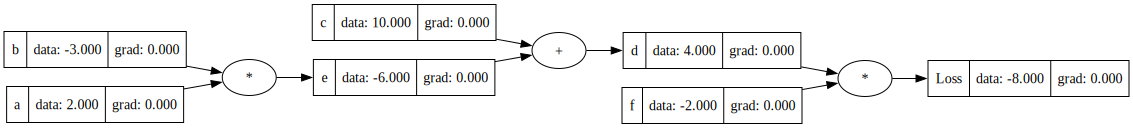

In [58]:
draw_dot(L)

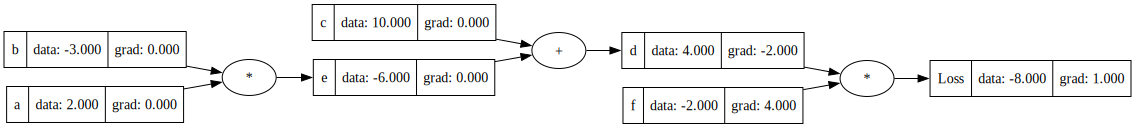

In [ ]:
L.grad = 1.0  ## set the gradient of the output node to 1.0 (Loss w.r.t. itself)
# Backpropagation
## L = d * f
d.grad += f.data * L.grad  ## dL/dd = f
f.grad += d.data * L.grad  ## dL/df = d

## f = constant
## d = e + c
e.grad += 1.0 * d.grad  ## dL/de = dL/dd * dd/de = f * 1
c.grad += 1.0 * d.grad  ## dL/dc = dL/dd * dd/dc = f * 1

## e = a * b
a.grad += b.data * e.grad  ## dL/da = dL/dd * dL/de * de/da = dL/de * b
b.grad += a.data * e.grad  ## dL/db = dL/dd * dL/de * de/db = dL/de * a


draw_dot(L)